In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [3]:

from sklearn.cluster import AffinityPropagation
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
import itertools
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv('YearPredictionMSD.csv',header=None)

In [6]:
data[0] = data[0].apply(lambda year: year-(year%10))
data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].min())/(data.iloc[:,1:].max() - data.iloc[:,1:].min())


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
import time
%matplotlib inline



from sklearn.cluster import AffinityPropagation
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
import itertools
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('YearPredictionMSD.csv',header=None)

data[0] = data[0].apply(lambda year: year-(year%10))

data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].min())/(data.iloc[:,1:].max() - data.iloc[:,1:].min())





data_ds = data[data[0]>1940]
min_samples = data_ds[0].value_counts().min()
decades = data_ds[0].unique()

data_ds = data[data[0]>1940]
min_samples = data_ds[0].value_counts().min()


data_sampled = pd.DataFrame(columns=data_ds.columns)

for decade in decades:
    data_sampled = data_sampled.append(data_ds[data_ds[0]==decade].sample(min_samples))
    
    
    
data_sampled[0] = data_sampled[0].astype(int)

X = data_sampled.iloc[:,1:].values
target = data_sampled.iloc[:,0].values

pca = decomposition.PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)


prin_comp = []
samples, features = X_pca.shape

for m in range(1,features+1):
    prin_comp.append("Principal Component {}".format(m))

cols = prin_comp+["Release Decade"]
data_pca = pd.DataFrame(np.append(X_pca, target.reshape(samples, 1), axis=1), columns=cols)
data_pca["Release Decade"] = data_pca["Release Decade"].astype(int)



In [12]:
data_pca.iloc[:,:20].head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20
0,0.310516,-0.057367,0.000579,-0.117866,0.151899,-0.078707,0.040545,0.070068,0.079384,-0.071437,-0.064374,0.022497,0.108242,-0.014227,0.071133,-0.050351,0.038091,-0.033695,-0.042197,0.007859
1,-0.126430,0.015740,-0.000562,0.052370,0.002038,-0.003513,0.029117,0.022675,0.030850,-0.024661,0.021926,-0.019391,-0.055389,-0.056535,-0.006784,-0.005854,0.004227,0.006392,0.002648,-0.043829
2,-0.151206,-0.043550,-0.015744,0.010655,0.013407,-0.037373,0.031412,0.009595,0.004639,0.049945,0.002645,0.002447,0.007943,-0.013128,0.026400,0.011060,-0.015171,0.009068,-0.020613,-0.010494
3,-0.156306,-0.050081,0.047066,-0.011060,-0.027171,0.016449,0.004470,0.066014,0.043080,-0.013274,-0.029228,-0.017630,-0.014576,-0.037414,-0.023823,-0.025709,0.010890,-0.000450,0.018232,-0.025702
4,-0.167611,0.012467,0.088339,-0.047519,-0.144453,-0.001726,-0.018154,0.040285,0.040065,-0.002869,-0.011234,0.020876,0.012330,0.018129,-0.014771,0.024340,-0.009539,-0.042135,0.001030,-0.011124


In [28]:
model = KMeans(n_clusters=7)
model.fit(data_pca.iloc[:,:20])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
np.unique(target)

array([1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [45]:
def convertTo7Vals(X):
    myArray = []
    for x in X:
        if x == 1950:
            myArray.append(0)
        elif x == 1960:
            myArray.append(1)
        elif x == 1970:
            myArray.append(2)
        elif x == 1980:
            myArray.append(3)
        elif x == 1990:
            myArray.append(4)
        elif x == 2000:
            myArray.append(5)
        elif x == 2010:
            myArray.append(6)
        
    return myArray

In [46]:
new_target = convertTo7Vals(target)

In [47]:
np.unique(new_target)

array([0, 1, 2, 3, 4, 5, 6])

In [48]:
sm.accuracy_score(new_target, model.labels_)

0.12558717877866815

In [38]:
model.labels_

array([3, 0, 0, ..., 2, 2, 1])

In [49]:
np.array(new_target)

array([5, 5, 5, ..., 0, 0, 0])

In [20]:
sm.accuracy_score(new_target, model.labels_)

0.08266556138896565

In [30]:
target

array([2000, 2000, 2000, ..., 1950, 1950, 1950])

In [29]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6])

In [53]:
new_target = convertTo7Vals(data_pca.iloc[:,20:].values)

In [54]:
sm.accuracy_score(new_target, model.labels_)

0.12558717877866815

In [55]:
data_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Release Decade
0,0.310516,-0.057367,0.000579,-0.117866,0.151899,-0.078707,0.040545,0.070068,0.079384,-0.071437,...,0.022497,0.108242,-0.014227,0.071133,-0.050351,0.038091,-0.033695,-0.042197,0.007859,2000
1,-0.126430,0.015740,-0.000562,0.052370,0.002038,-0.003513,0.029117,0.022675,0.030850,-0.024661,...,-0.019391,-0.055389,-0.056535,-0.006784,-0.005854,0.004227,0.006392,0.002648,-0.043829,2000
2,-0.151206,-0.043550,-0.015744,0.010655,0.013407,-0.037373,0.031412,0.009595,0.004639,0.049945,...,0.002447,0.007943,-0.013128,0.026400,0.011060,-0.015171,0.009068,-0.020613,-0.010494,2000
3,-0.156306,-0.050081,0.047066,-0.011060,-0.027171,0.016449,0.004470,0.066014,0.043080,-0.013274,...,-0.017630,-0.014576,-0.037414,-0.023823,-0.025709,0.010890,-0.000450,0.018232,-0.025702,2000
4,-0.167611,0.012467,0.088339,-0.047519,-0.144453,-0.001726,-0.018154,0.040285,0.040065,-0.002869,...,0.020876,0.012330,0.018129,-0.014771,0.024340,-0.009539,-0.042135,0.001030,-0.011124,2000


In [56]:
colormap = np.array(['red','blue','green','yellow','orange','black', 'purple'])

In [59]:
colormap[new]

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


Text(0.5,1,'Petal')

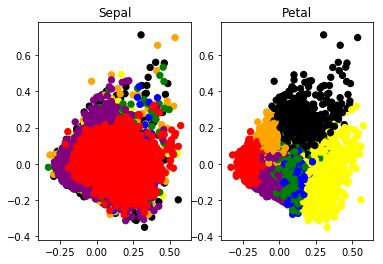

In [62]:
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[new_target], s=40)
plt.title('Sepal')


plt.subplot(1, 2, 2)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[model.labels_], s=40)
plt.title('Petal')

In [ ]:
col